In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
my_data = pd.read_csv('/home/lin/教材/Financial_data/data/finance_M4/my_fx_data', header = None, usecols = [1], names = ['price'])

In [3]:
my_data.describe()

,price
count,4197.000000
mean,8665.180105
std,2891.102233
min,3613.400000
25%,5867.900000
50%,8626.700000
75%,10569.800000
max,15178.000000


In [4]:
my_data.dtypes

price    float64
dtype: object

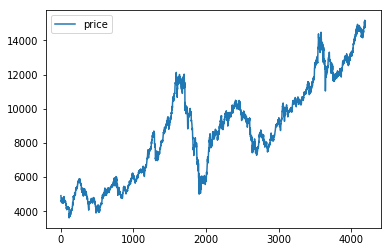

In [5]:
my_data.plot()

In [6]:
logR = np.log(my_data).diff()
logR.head()

,price
0,NaN
1,-0.009711
2,-0.039346
3,-0.018113
4,0.002911


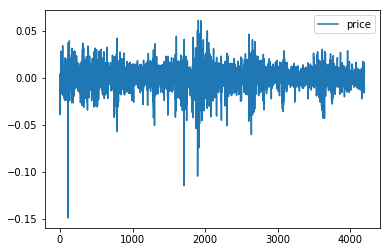

In [7]:
logR.plot()

In [8]:
logR.drop(logR.index[0], inplace = True)

In [9]:
logR.describe()

,price
count,4196.000000
mean,0.000267
std,0.012079
min,-0.149340
25%,-0.005606
50%,0.000742
75%,0.006732
max,0.060968


In [10]:
test_data = np.array([-7., -5, 1, 4, 5])

In [11]:
#test_data = logR

In [12]:
numInDen = 5000
domain = np.linspace(min(test_data) - 3, max(test_data) + 3, numInDen)
fx = np.zeros(numInDen)
kernels = np.zeros([domain.size, test_data.size])

In [13]:
obsNum = test_data.size

In [14]:
bandW = 0.8
for i in range(numInDen):
    kernel = 1. / ((2. * np.pi) ** 0.5) * np.exp(-((domain[i]- test_data) / bandW) ** 2 / 2)
    kernels[i] = kernel
    fx[i] = (1. / (obsNum * bandW)) * np.sum(kernel)

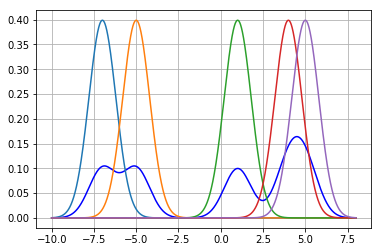

In [15]:
plt.plot(domain, fx, 'b')
plt.grid(True)
#plt.xlim((-.5, .5))
plt.plot(domain, kernels)

In [16]:
#test_data = my_data[: 1000]
obsNum = test_data.size
diffs = np.zeros([test_data.size, test_data.size])
for i in range(test_data.size):
    diffs[i] = test_data[i] - test_data
    
bandRange = np.linspace(0.001, 1, 100)
kerScores = np.zeros(bandRange.size)
firstHalf = np.zeros(bandRange.size)
secondHalf = np.zeros(bandRange.size)
totalKer = np.zeros(bandRange.size)

for i in range(bandRange.size):
    bandW = bandRange[i]
    kernelStars = 1. / ((4. * np.pi) ** 0.5) * np.exp(-((diffs / bandW) ** 2 / 4)) - (2. / ((2. * np.pi) ** 0.5)) * np.exp(-((diffs / bandW) ** 2 / 2))
    #plt.plot(kernelStars)
    #plt.legend()
    #plt.show()
    totalKernels = np.sum(kernelStars)
    #print(totalKernels / obsNum ** 2)
    scoreBandW = (1. / (bandW * obsNum ** 2)) * totalKernels + (2. / (obsNum * bandW)) * (1. / ((2. * np.pi) ** 0.5))
    kerScores[i] = scoreBandW
    firstHalf[i] = (1. / (bandW * obsNum ** 2)) * totalKernels
    secondHalf[i] = (2. / (obsNum * bandW)) * (1. / ((2. * np.pi) ** 0.5))
    totalKer[i]  = totalKernels / (obsNum ** 2)

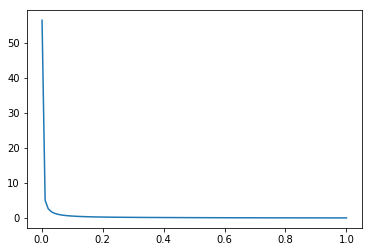

In [17]:
plt.plot(bandRange, kerScores)

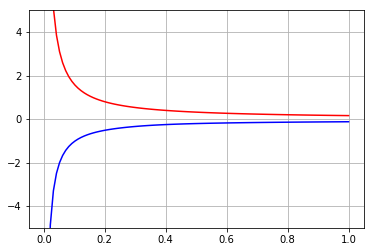

In [18]:
plt.plot(bandRange, firstHalf, 'b')
plt.plot(bandRange, secondHalf, 'r')
plt.ylim((-5, 5))
plt.grid(True)

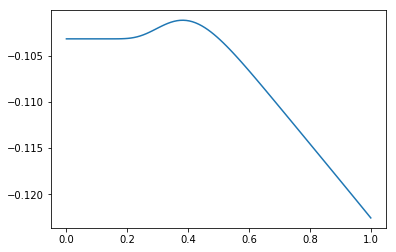

In [19]:
plt.plot(bandRange, (totalKer) )